In [ ]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [5]:
data= pd.read_csv("meansTotal.csv")

In [6]:
dataProp = data['prop_id']
data.drop(['prop_id','mean_prop_review_score','mean_prop_location_score2'],axis=1,inplace=True)

In [7]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

C:\Users\Rens\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    print(k)
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14


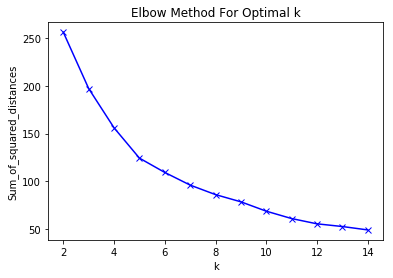

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


Elbows seems to be at 6

In [10]:
km = KMeans(n_clusters=6)
km = km.fit(data_transformed)
d = {'prop_id': dataProp, 'clusters': km.labels_}
propClusters = pd.DataFrame(data = d)
propClusters.to_csv("propClusters.csv",index=False)